In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [3]:
def load_results(txt_results_path):
    layers = []
    results = {}
    results['imagenet'] = {'layers':[], 'MSE':[], 'log_MSE':[]}
    results['random_weights'] = {'layers':[], 'MSE':[], 'log_MSE':[]}
    results['random_ratios'] = {'layers':[], 'MSE':[], 'log_MSE':[]}
    #with open(os.path.join(txt_results_path, 'results.txt'), 'r') as file:
    with open(txt_results_path, 'r') as file:
        for line in file:
            if 'imagenet' in line:
                _from ='imagenet'
            elif 'random_ratios' in line:
                _from = 'random_ratios'
            elif 'random_weights' in line:
                _from = 'random_weights'

            if 'MSE' in line: # Check r_square_adj BEFORE r_square
                split_line = line.split(' ')
                layer, mse = split_line[split_line.index('MSE')+1:]
                if not layer in layers:
                    layers.append(layer)
                results.get(_from).get('layers').append(layer)
                results.get(_from).get('MSE').append(float(mse))
                results.get(_from).get('log_MSE').append(np.log10(float(mse)))
    return results, layers

def load_results_rsquared(txt_results_path):
    layers = []
    results = {}
    results['imagenet'] = {'layers':[], 'R':[], 'expR':[]}
    results['random_weights'] = {'layers':[], 'R':[], 'expR':[]}
    results['random_ratios'] = {'layers':[], 'R':[], 'expR':[]}
    #with open(os.path.join(txt_results_path, 'results.txt'), 'r') as file:
    with open(txt_results_path, 'r') as file:
        for line in file:
            if 'imagenet' in line:
                _from ='imagenet'
            elif 'random_ratios' in line:
                _from = 'random_ratios'
            elif 'random_weights' in line:
                _from = 'random_weights'

            if 'R_square ' in line: # Check r_square_adj BEFORE r_square
                split_line = line.split(' ')
                #import pdb; pdb.set_trace()
                layer, mse = split_line[split_line.index('R_square')+1:]
                if not layer in layers:
                    layers.append(layer)
                results.get(_from).get('layers').append(layer)
                results.get(_from).get('R').append(float(mse))
                results.get(_from).get('expR').append(float(mse))
    return results, layers


In [4]:
results, layers = load_results_rsquared('results_copies/inception_v3/n01608432.txt')

In [5]:
prova = np.exp(results['imagenet']['R']) / np.e 
random_weights = np.exp(results['random_weights']['R']) / np.e 
random_ratios = np.exp(results['random_ratios']['R']) / np.e 

In [6]:
results, layers = load_results_rsquared('results_copies/inception_v3/n02058221.txt')
prova1 = np.exp(results['imagenet']['R']) / np.e 
random_weights1 = np.exp(results['random_weights']['R']) / np.e 
random_ratios1 = np.exp(results['random_ratios']['R']) / np.e 
results, layers = load_results_rsquared('results_copies/inception_v3/n04037443.txt')
prova2 = np.exp(results['imagenet']['R']) / np.e 
random_weights2 = np.exp(results['random_weights']['R']) / np.e 
random_ratios2 = np.exp(results['random_ratios']['R']) / np.e 

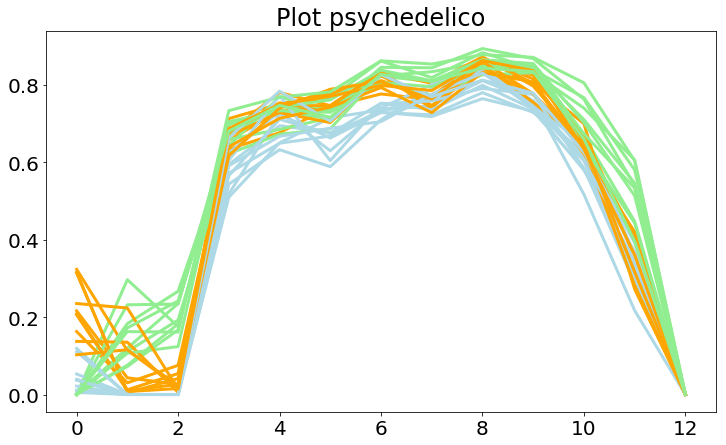

In [11]:
#prova = np.exp(results['imagenet']['R']) / np.e 
#prova1 = np.exp(results['imagenet']['R']) / np.e 
#prova2 = np.exp(results['imagenet']['R']) / np.e 
plt.plot(prova[:len(layers)], c='lightblue')
plt.plot(prova1[:len(layers)], c='orange')
plt.plot(prova2[:len(layers)], c='lightgreen')
avg_prova = prova[:len(layers)]
avg_prova1 = prova1[:len(layers)]
avg_prova2 = prova2[:len(layers)]
#
avg_random_weights = random_weights[:len(layers)]
avg_random_ratios = random_ratios[:len(layers)]
avg_random_weights1 = random_weights1[:len(layers)]
avg_random_ratios1 = random_ratios1[:len(layers)]
avg_random_weights2 = random_weights2[:len(layers)]
avg_random_ratios2 = random_ratios2[:len(layers)]
#
for rep in range(1,10):
    plt.plot(prova[len(layers)*rep:len(layers)+len(layers)*rep], c='lightblue')    
    plt.plot(prova1[len(layers)*rep:len(layers)+len(layers)*rep], c='orange')    
    plt.plot(prova2[len(layers)*rep:len(layers)+len(layers)*rep], c='lightgreen')  
    #
    avg_prova += prova[len(layers)*rep:len(layers)+len(layers)*rep]
    avg_prova1 += prova1[len(layers)*rep:len(layers)+len(layers)*rep]
    avg_prova2 += prova2[len(layers)*rep:len(layers)+len(layers)*rep]
    #
    avg_random_weights += random_weights[len(layers)*rep:len(layers)+len(layers)*rep]
    avg_random_weights1 += random_weights1[len(layers)*rep:len(layers)+len(layers)*rep]
    avg_random_weights2 += random_weights2[len(layers)*rep:len(layers)+len(layers)*rep]
    #
    avg_random_ratios += random_ratios[len(layers)*rep:len(layers)+len(layers)*rep]
    avg_random_ratios1 += random_ratios1[len(layers)*rep:len(layers)+len(layers)*rep]
    avg_random_ratios2 += random_ratios2[len(layers)*rep:len(layers)+len(layers)*rep]
    
plt.title('Plot psychedelico')

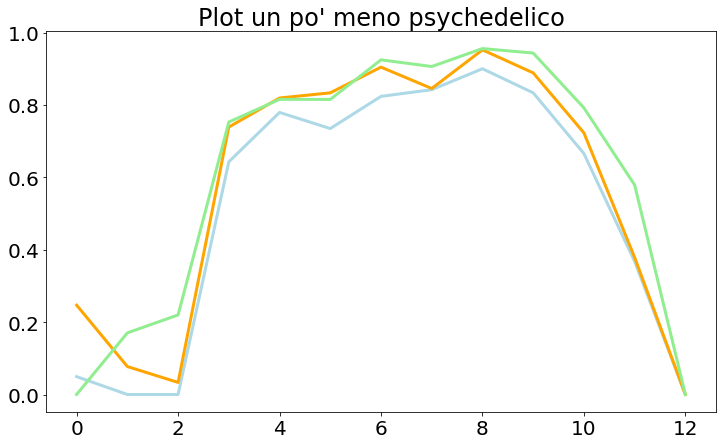

In [12]:
plt.plot(avg_prova/rep, c='lightblue')    
plt.plot(avg_prova1/rep, c='orange')    
plt.plot(avg_prova2/rep, c='lightgreen')  
plt.title('Plot un po\' meno psychedelico')

([<matplotlib.axis.XTick at 0x7f7166e7c150>,
 <a list of 13 Text xticklabel objects>)

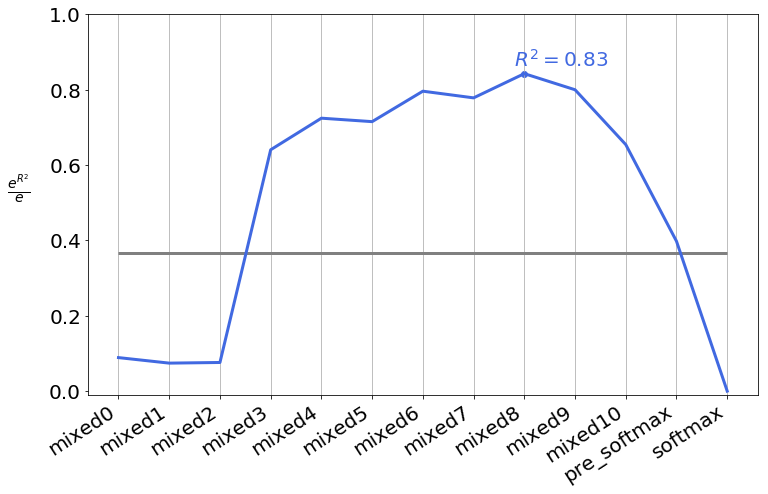

In [18]:
plt.rcParams['figure.figsize']=(12,7)
plt.rcParams['font.size']=20
plt.rcParams['lines.linewidth']=3
imagenet_res=(avg_prova+avg_prova1+avg_prova2)/30
random_weights=(avg_random_weights+avg_random_weights1+avg_random_weights2)/30
random_ratios = (avg_random_ratios+avg_random_ratios1+avg_random_ratios2)/30
plt.plot((avg_prova+avg_prova1+avg_prova2)/30, c='royalblue') 
#plt.plot((avg_random_weights+avg_random_weights1+avg_random_weights2)/30, c='orange')
#plt.plot((avg_random_ratios+avg_random_ratios1+avg_random_ratios2)/30, c='forestgreen') 


legend=['ImageNet weights','random weights', ]#'random scale measures']
#plt.title('ADD confindence intervals')
plt.ylabel(r'$\frac{e^{R^2}}{e}}$', rotation=0, labelpad=30)
#$$frac{e^{R^2}}{e}$$')
plt.ylim([-0.01,1.])
#plt.legend(legend, loc='best', fontsize='small')
plt.grid(which='major', axis='x')

plt.scatter(8,imagenet_res[8], color='royalblue')
plt.text(8-0.2, imagenet_res[8]+0.02, r'$R^2=${:.2f}'.format(np.log(imagenet_res[8])+1), color='royalblue')

#plt.scatter(9,random_ratios[9], color='forestgreen')
#plt.text(9-0.2, random_ratios[9]+0.02, r'$R^2=${:.2f}'.format(np.log(random_ratios[9])+1), color='forestgreen')

#plt.scatter(10,random_weights[10], color='orange')
#plt.text(9-0.2, random_weights[9]+0.02, r'$R^2=${:.2f}'.format(np.log(random_weights[9])+1), color='orange')

plt.hlines(1/np.e, 0, 12, color='grey') 
plt.xticks(np.arange(13),layers, rotation=33, ha='right')